# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
-0.003
-0.002
-0.002
-0.003
-0.003
-0.002
-0.002
-0.002
-0.001
0.0
0.001
-0.001
0.001
0.003
0.002
0.0
0.0
0.001
0.002
-0.001
0.0
-0.004
0.001
0.001
0.002
0.0
0.998
0.998
0.998
2.001
2.001
1.999
2.0
2.999
2.999
2.998
2.999
2.999
4.005
4.001
4.0
4.0
5.001
5.0
4.999
5.001
5.001
6.002
5.999
5.999
6.001
6.646
6.646
6.643
6.643
7.295
7.291
7.291
7.293
8.287
8.295
8.295
8.295
9.288
9.29
9.293
9.293
9.293
10.289
10.291
10.291
10.291
10.29
11.289
11.293
11.293
11.293
11.294
12.294
12.289
12.289
12.293
13.289
13.29
13.289
13.291
14.068
14.072
14.071
14.07
14.071
14.853
14.853
14.853
14.854
14.854
15.856
15.855
15.854
15.856
16.845
16.852
16.852
16.855
17.851
17.85
17.85
18.843
18.846
18.847
18.849
18.849
19.846
19.847
19.847
20.842
20.847
20.847
20.845
21.497
21.499
21.496
21.501
22.15
22.146
22.147
22.147
23.144
23.145
23.144
23.148
23.146
24.146
24.143
24.146
24.144
25.141
25.141
25.137
25.139
26.138
26.138
26.141
26.139
27.152
27.153
27.154
27.154
28.155
28.152
28.15
28.891
28.889
28.

57.873
57.872
57.876
57.872
57.874
57.874
57.874
57.873
57.874
57.872
57.872
57.869
57.87
57.872
57.872
57.875
57.87
57.869
57.87
57.87
57.87
57.872
57.872
57.87
57.87
57.87
57.87
57.869
57.869
57.87
57.87
58.157
58.26
58.264
58.263
58.263
58.262
58.261
58.263
58.26
58.261
58.261
58.264
58.262
58.262
58.257
58.258
58.258
58.259
58.261
58.257
58.258
58.254
58.258
58.254
58.257
58.257
58.257
58.256
58.26
58.26
58.262
58.258
58.256
58.254
58.251
58.255
58.256
58.375
58.372
58.373
58.375
58.428
58.428
58.428
58.427
58.472
58.474
58.474
58.474
58.474
58.473
58.471
58.476
58.477
58.472
58.475
58.473
58.472
58.47
58.471
58.471
58.47
58.472
58.907
58.907
58.906
58.903
58.908
58.906
58.908
58.912
59.063
59.103
59.103
59.103
59.123
59.124
59.124
59.122
59.122
59.123
59.423
59.423
59.461
59.462
59.465
59.461
59.465
59.462
59.462
59.464
59.706
59.74
59.742
59.743
59.744
59.743
59.743
59.745
59.746
59.855
59.895
59.895
59.899
59.895
59.893
59.893
59.895
60.208
60.21
60.251
60.251
60.249
60.25
60.25

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,-0.003
3,6,-0.002
4,8,-0.002
...,...,...
1348,2696,60.250
1349,2698,60.251
1350,2700,60.250
1351,2702,60.250


<IPython.core.display.Javascript object>


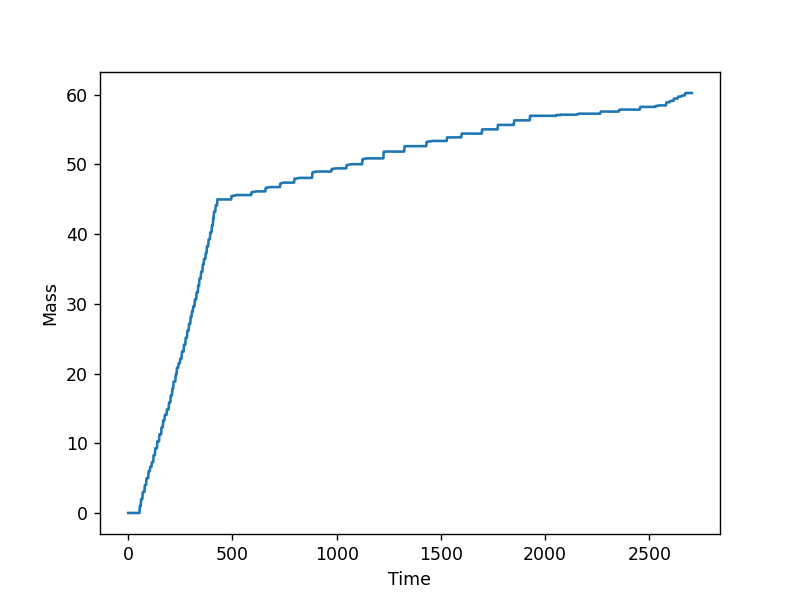

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_120523_S427-432.csv')